# Coverage profile and haplotype purging

Assemblies were generated from long reads and corrected using short reads for one iteration on PILON

In [1]:
mkdir 009.Purge_haplotigs

In [4]:
WORKDIR=/workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs
ASSEMBLY_PATH=/workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs
ONT=/workspace/hraczw/github/hoki_genomics/ALL_HOKI_ont_plusP.fastq.gz

In [5]:
cat $ASSEMBLY_PATH/assemblies.txt

/workspace/hraczw/github/hoki_genomics/005.pilon_correctFLYE/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.fasta


In [6]:
module unload perl/5.28.0
module load perl/5.28.0-thread-multi
module load bedtools/2.27.1
module load R/3.6.1
export PATH=$PATH:/workspace/hrarnc/GitHub/minimap2
module load conda/4.5.1
conda activate purge_haplotigs_env

(base) (/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [7]:
module load samtools
module list

(/workspace/appscratch/miniconda/purge_haplotigs_env) Currently Loaded Modulefiles:
  1) powerPlant/core            9) unixODBC/2.3.0
  2) texlive/20151117          10) JAGS/4.2.0
  3) pandoc/1.19.2             11) gdal/2.4.0
  4) git/2.21.0                12) proj/5.2.0
  5) perlbrew/0.76             13) R/3.6.1
  6) asub/2.2                  14) conda/4.5.1
  7) perl/5.28.0-thread-multi  15) samtools/1.9
  8) bedtools/2.27.1
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [8]:
python << EOF

import sys, os

f = open('$ASSEMBLY_PATH/assemblies.txt', 'r')

for line in f:
    assembly = line.split('\n')[0]
    assemblyName = line.split('/')[-1].split('.fa')[0]
    os.system('bsub -J minimap2 \
            -m wkoppg32 \
            -n 20 \
            -o $WORKDIR/' + assemblyName + '_minimap2.out \
            -e $WORKDIR/' + assemblyName + '_minimap2.err \
            "minimap2 -t 20 --secondary=no -ax map-ont ' + assembly + ' $ONT | \
            samtools sort -@ 20 -o $WORKDIR/' + assemblyName + '.ONT.aligned.sorted.bam -"')


f.close()

EOF

Job <301923> is submitted to default queue <lowpriority>.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [9]:
export PATH=/workspace/appscratch/miniconda/purge_haplotigs_env/bin/:$PATH

(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [10]:
purge_haplotigs hist

[20-04-2021 10:17:28] bedtools OK!
[20-04-2021 10:17:28] Rscript OK!
[20-04-2021 10:17:28] samtools OK!
[20-04-2021 10:17:28] ALL DEPENDENCIES OK



USAGE:
purge_haplotigs  hist  -b aligned.bam  -g genome.fasta  [ -t threads ]

REQUIRED:
-b / -bam       BAM file of aligned and sorted reads/subreads to the reference
-g / -genome    Reference FASTA for the BAM file.

OPTIONAL:
-t / -threads   Number of worker threads to use, DEFAULT = 4, MINIMUM = 2
-d / -depth     Maximum cutoff for depth. DEFAULT = 200, increase if needed,
                set much higher than your expected average coverage.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [11]:
# this step will generate a temp folder and running multiple jobs with the same folder generating can collapse
# better to create different subfolders and then run each job under different folder


python << EOF

f = open('$ASSEMBLY_PATH/assemblies.txt', 'r')


for line in f:
    assembly = line.split('\n')[0]
    assemblyName = line.split('/')[-1].split('.fa')[0]
    command = 'bsub -J hist \
    -m wkoppg32 \
    -n 20 \
    -o $WORKDIR/' + assemblyName + '_hist.out \
    -e $WORKDIR/' + assemblyName + '_hist.err \
    "purge_haplotigs hist \
    -b $WORKDIR/' + assemblyName + '.ONT.aligned.sorted.bam \
    -g ' + assembly + ' -t 20 -d 300"'
    print (command)

f.close()

EOF

(/workspace/appscratch/miniconda/purge_haplotigs_env) (/workspace/appscratch/miniconda/purge_haplotigs_env) (/workspace/appscratch/miniconda/purge_haplotigs_env) (/workspace/appscratch/miniconda/purge_haplotigs_env) bsub -J hist     -m wkoppg32     -n 20     -o /workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_hist.out     -e /workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_hist.err     "purge_haplotigs hist     -b /workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam     -g /workspace/hraczw/github/hoki_genomics/005.pilon_correctFLYE/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.fasta -t 20 -d 300"
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [13]:
bsub -J hist     -m wkoppg32     -n 20     -o /workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_hist.out     -e /workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_hist.err     "purge_haplotigs hist     -b /workspace/hraczw/github/hoki_genomics/009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam     -g /workspace/hraczw/github/hoki_genomics/005.pilon_correctFLYE/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.fasta -t 20 -d 300"

Job <304282> is submitted to default queue <lowpriority>.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [15]:
mv FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted* 009.Purge_haplotigs

(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [16]:
ls 009.Purge_haplotigs/

assemblies.txt
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_hist.err
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_hist.out
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_minimap2.err
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria_minimap2.out
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam.bai
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam.gencov
FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam.histogram.png
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

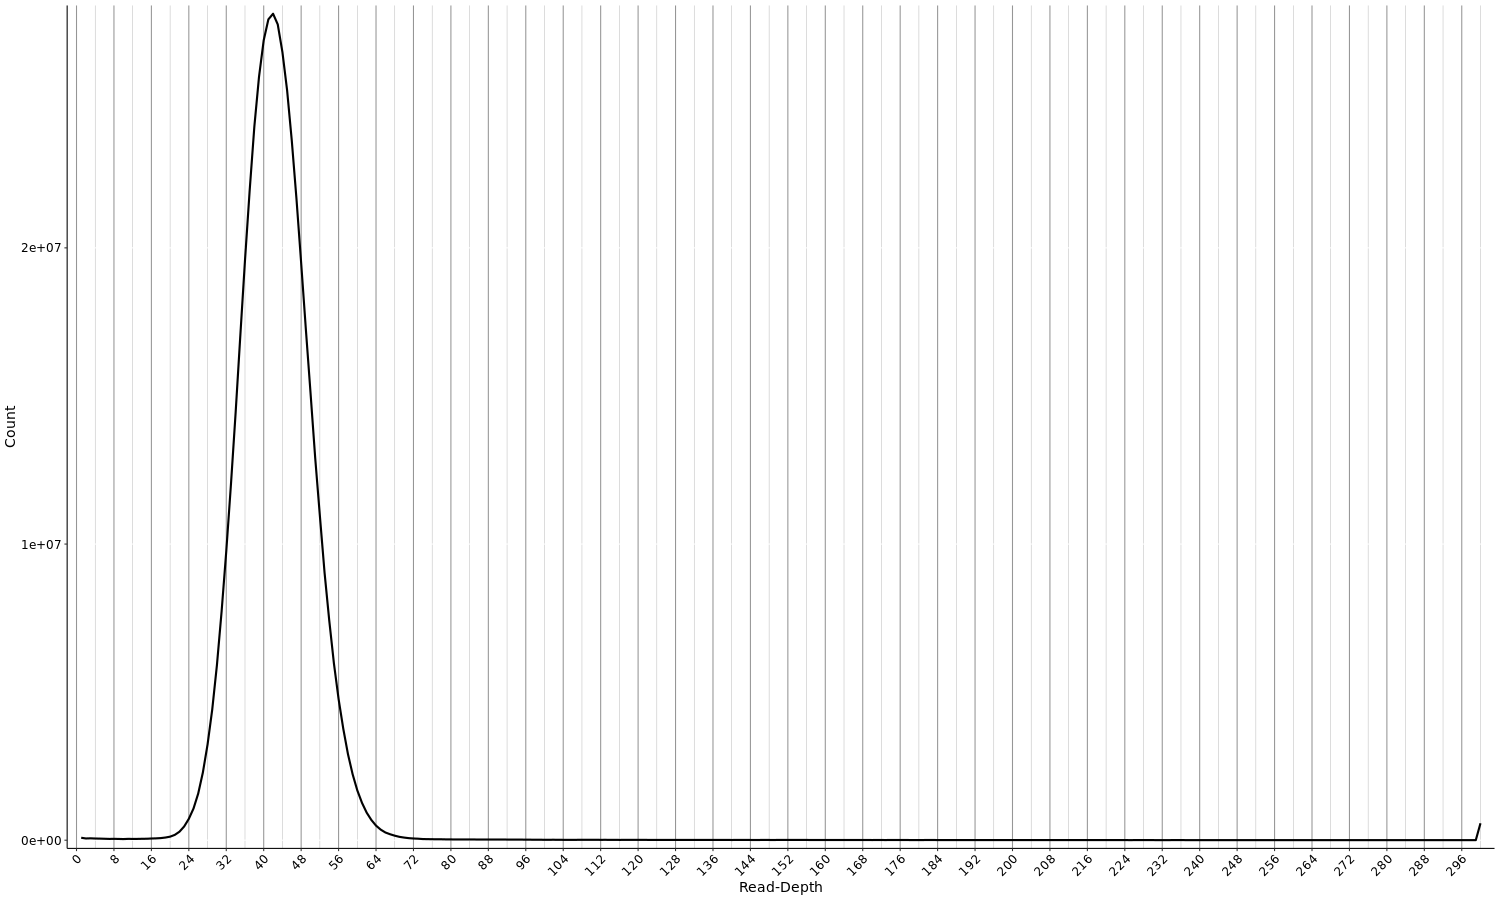

(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [17]:
cat 009.Purge_haplotigs/FlyeAssembly_PFR_AGRF_plusP_P1_pilon-2_corrected.noBacteria.ONT.aligned.sorted.bam.histogram.png | display